# Denetimsiz Öğrenme

In [1]:
from sklearn.datasets import make_blobs #Rastgele veri oluşturma kütüphanesi
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
X, y_true = make_blobs( n_samples=300, centers=4, random_state=42 )  #Burada y_true kullanılma sebebi,doğru y değerleri yani doğru küme verisini tutması   .
#n_samples: veri sayısı 
#centers: Grup küme sayısı
X

array([[ -9.29768866,   6.47367855],
       [ -9.69874112,   6.93896737],
       [ -1.68665271,   7.79344248],
       [ -7.09730839,  -5.78133274],
       [-10.87645229,   6.3154366 ],
       [ -6.02196757,  -7.04004812],
       [  4.81305976,   2.35848706],
       [ -6.46669574,  -7.44383415],
       [ -2.98837186,   8.82862715],
       [  3.44857534,   2.62972329],
       [ -3.11090424,  10.86656431],
       [  4.99689432,   1.28026009],
       [ -2.30033403,   7.054616  ],
       [ -3.92456837,   8.59364081],
       [ -9.48897033,   6.83639753],
       [ -3.21125072,   8.68662398],
       [-10.46587019,   7.37160786],
       [  2.61473625,   2.159624  ],
       [ -2.41212007,   9.98293112],
       [ -1.92234053,  11.20474175],
       [  5.79847442,   1.15248737],
       [ -2.67048333,   9.41833699],
       [ -5.90450746,  -7.02716697],
       [ -8.95065581,   7.10255332],
       [ -2.97261532,   8.54855637],
       [ -8.30852358,   8.76509154],
       [ -9.41509909,   8.07891414],
 

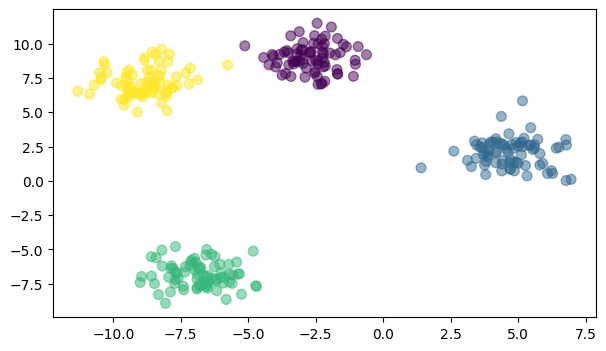

In [3]:
plt.figure( figsize=(7,4) )
plt.scatter( X[:,0], X[:,1], c=y_true, s=50 ,alpha=0.5) #c renk arrayine kümeleri verirsek farklı renklendirir.alpha renk saydamlığını belirler.s ise size noktanın alanını belirler.
# X[:,0] => Tüm satırların 0. sütununu al. X[:,1] => Tüm satırların 1. sütununu al.

In [4]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
X = df[ [ "Annual Income (k$)", "Spending Score (1-100)" ] ].values #.values yapınca veriyi dataframeden array haline çevirdik.



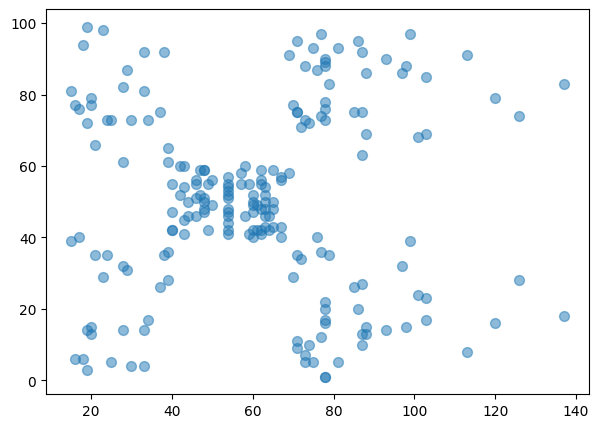

In [6]:
plt.figure( figsize=(7,5) )
plt.scatter( X[:,0], X[:,1] , s=50 ,alpha=0.5)

## K-Means Algoritması : Belirli bir kümelenme ile sistemin veriler arasındaki yapıyı öğrenmesidir.

In [7]:
from sklearn.cluster import KMeans

In [8]:
model = KMeans( n_clusters=5, random_state=42 ) #n_clusters parametresi küme sayısını belirtir.
model.fit(X) #Burada sadece train veri setini verdik çünkü etiketler öğrenme modelinde yok.

KMeans(n_clusters=5, random_state=42)

In [9]:
model.cluster_centers_ #Çıkan sonuçtataki veriler merkez küme koordinatlarını verir.

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

In [10]:
y = model.predict(X)
y

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

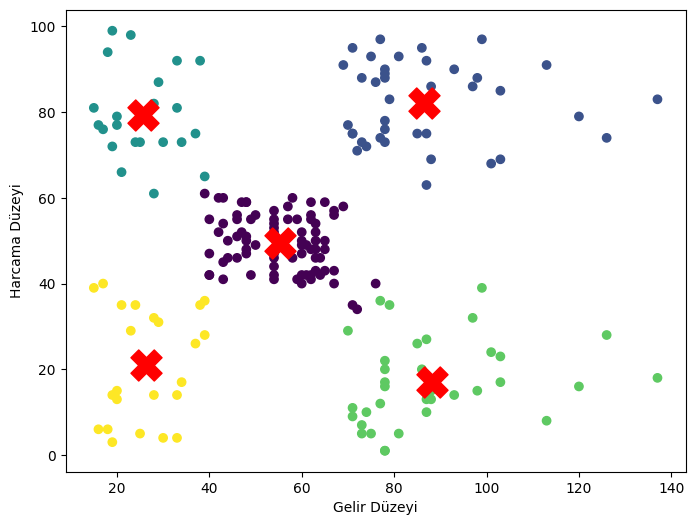

In [11]:
plt.figure( figsize=(8,6) )
plt.scatter( X[:,0], X[:,1], c=y ) #Burda  c parametresi yani renklere y tahmin dizisini verme sebebimiz her gruba farklı renk vermesidir. Bu sayede her x,y koordinatındaki veriyi ait olduğu küme rengine boyadı.
plt.scatter( model.cluster_centers_[:,0], model.cluster_centers_[:,1], c="red", s=500, marker="X" ) 
plt.xlabel("Gelir Düzeyi")
plt.ylabel("Harcama Düzeyi")
plt.show()

In [12]:
#Burada bazı veriler kümelerden çok aykırı durumda bundan sebep küme sayımız yanlış gibi buna çözüm yolları bulmalıyız.

### Dirsek ELBOW Metodu

In [13]:
model.inertia_ # İnertias her merkez kümenin diğer noktalar arasında kendisine olan uzaklığının karelerinin toplamıdır. Ne kadar çok merkez küme olursa inerrtias düşer ancak bu sayı abartılmamalı dirsek noktasında bırakılmalıdır. Diğer veri merkezleri ile arasındaki ilişkiyi ölçmez

44448.45544793371

In [14]:
#Bu metodun amacı inertias değerlerini karşılaştırmak.
def elbow_method():
    inertias = []
    for k in range(2,11):
        model = KMeans( n_clusters=k , random_state=42)
        model.fit(X)
        inertias.append( model.inertia_ )
    print(inertias)
    plt.figure( figsize=(8,6) )
    plt.plot( range(2,11), inertias )

[183653.32894736846, 106348.3730621112, 73880.64496247195, 44448.45544793371, 40825.16946386947, 33642.57922077922, 26686.83778518779, 24766.47160979344, 23103.122085983912]


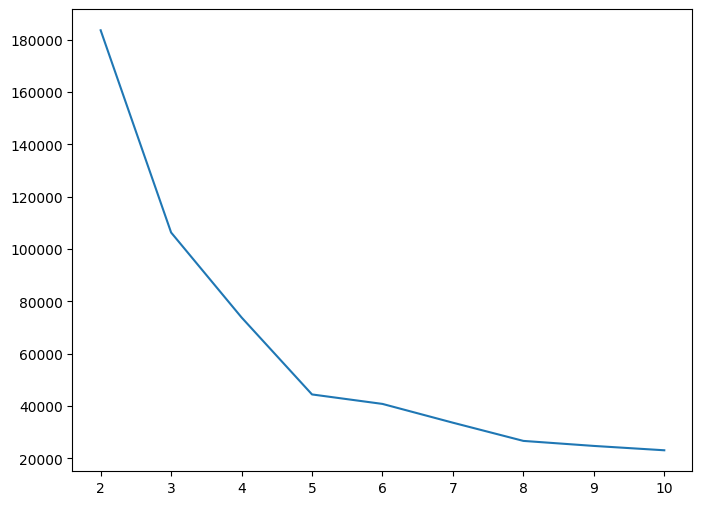

In [15]:
elbow_method()
#Grafiğe göre dirseğin oluştuğu nokta 5. Eğer dirsek gözükmüyorsa halen grafikte parametreleri arttırmak veya değişmek gerekiyor.

### Silhoutte Metodu

In [16]:
from sklearn.metrics import silhouette_score

In [17]:
#Bu yöntemdede noktaların sadece ait olduğu küme merkezine uzaklığı değil diğer merkez noktalara uzaklığıda hesaba katılır.
def silh_method():
    scores = []
    for k in range(2,11):
        kmeans = KMeans( n_clusters=k, random_state=42 )
        y = kmeans.fit_predict(X)
        scores.append( silhouette_score(X,y) )
    print(scores)
    plt.figure(figsize=(8,6))
    plt.plot( range(2,11), scores )
    plt.show()

[np.float64(0.39564531743995546), np.float64(0.46761358158775435), np.float64(0.4937945814354117), np.float64(0.553931997444648), np.float64(0.5128405328004378), np.float64(0.5017174409749505), np.float64(0.4962769338093321), np.float64(0.45587414130065596), np.float64(0.4426214845978157)]


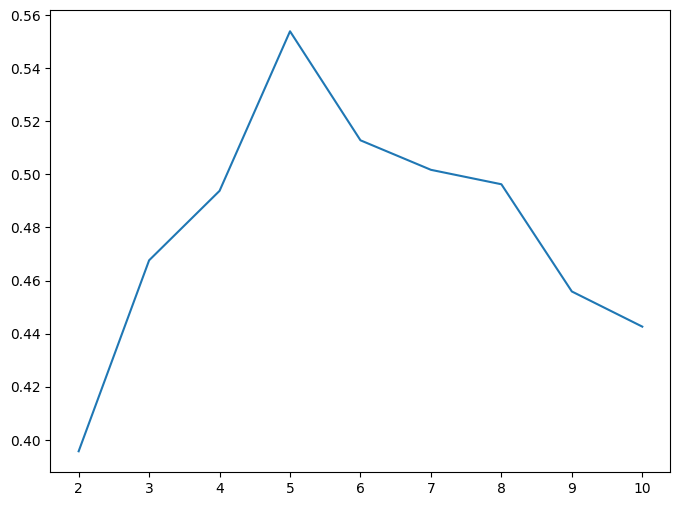

In [18]:
silh_method()

##### Davis Bouldin Metodu araştır bu CSV uygula. <br> <br> Makine öğrenmesinde Scaling (Özellik Ölçekleme) nedir nasıl yapılır araştırıp ipynb oluştur.